TensorFlow is an end-to-end open-source deep learning framework developed by Google and released in 2015. It is known for documentation and training support, scalable production and deployment options, multiple abstraction levels, and support for different platforms, such as Android.

With this example we will classify images of clothing, like sneakers and shirts and we will use tf.keras, a high-level API to build and train models in TensorFlow.

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, Conv1D
from tensorflow.keras import Model

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)

TensorFlow version: 2.7.0-rc1


This example uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's explore our dataset! 
In the training set is we have 60000 images with 28x28 dimension

In [4]:
print('Trainining set: ',train_images.shape)

Trainining set:  (60000, 28, 28)


We have 60000 labels as well, and the training labels are integer between 0 and 9 (10 in total as the number of classes)

In [5]:
print('Trainining labels: ', len(train_labels))

Trainining labels:  60000


In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

The test sample has 10000 images with 28x28 dimension

In [7]:
print('Test set: ', test_images.shape)

Test set:  (10000, 28, 28)


We have 10000 labels as well, and the training labels are integer between 0 and 9 (10 in total as the number of classes)

In [8]:
print('Test labels: ', len(test_labels))

Test labels:  10000


Let's explore our dataset! 
In the training set is we have 60000 images with 28x28 dimension

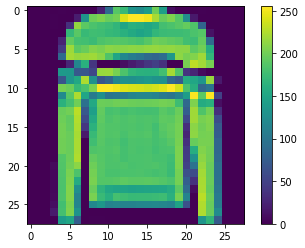

In [9]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

Before starting the training it's important to normalize the input to 1 by dividing the training and the test set to 255 (pixel values fall in the range of 0 to 255)

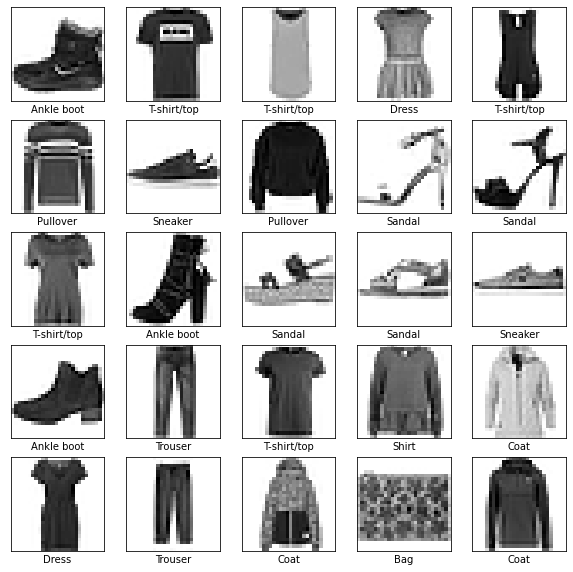

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Building the model with DNN

In [12]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels)).shuffle(20000).batch(200)

test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(200)


2022-11-21 23:37:22.840258: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (34)
2022-11-21 23:37:22.840318: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2022-11-21 23:37:22.840688: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of several tf.keras.layers.Dense layers with a Dropout layer in between. 
Below we visualise the model:

In [13]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten(input_shape=(28, 28))
    self.d1 = Dense(128, activation='relu')
    self.drop1 = Dropout(.2, input_shape=(28,28))
    self.d2 = Dense(100, activation='relu')
    self.drop2 = Dropout(.2, input_shape=(28,28))
    self.d3 = Dense(80, activation='relu')
    self.drop3 = Dropout(.2, input_shape=(28,28))
    self.d4 = Dense(60, activation='relu')
    self.drop4 = Dropout(.2, input_shape=(28,28))
    self.d5 = Dense(40, activation='relu')
    self.d6 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.drop1(x)
    x = self.d2(x)
    x = self.drop2(x)
    x = self.d3(x)
    x = self.drop3(x)
    x = self.d4(x)
    x = self.drop4(x)
    x = self.d5(x)
    return self.d6(x)

# Create an instance of the model
model = MyModel()

In [14]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam(0.001)

model.compile(optimizer=optimizer,
              loss=loss_object,
              metrics=['accuracy'])

In [15]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

tf.function is a decorator function provided by Tensorflow 2.0 that converts regular python code to a callable Tensorflow graph function, which is usually more performant and python independent. It is used to create portable Tensorflow models.

In [16]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [17]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [18]:
EPOCHS = 30

patience = 10
wait = 0
best = 0

train_loss_plot = []
test_loss_plot = []
train_acc_plot = []
test_acc_plot = []

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)
        
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)
    
  t_acc = test_accuracy.result()
  t_loss = test_loss.result()

  train_loss_plot.append(train_loss.result().numpy())  
  test_loss_plot.append(t_loss.numpy())
  train_acc_plot.append(train_accuracy.result().numpy())  
  test_acc_plot.append(t_acc.numpy())    

  #early stopping  

  wait += 1
  if abs(t_acc.numpy()-best) > 0.01:
      best = t_acc.numpy()
      wait = 0
  if wait >= patience:
      break

            
  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.8561126589775085, Accuracy: 68.83666229248047, Test Loss: 0.4912571609020233, Test Accuracy: 82.29000091552734
Epoch 2, Loss: 0.5012459754943848, Accuracy: 82.61000061035156, Test Loss: 0.43273404240608215, Test Accuracy: 84.41999816894531
Epoch 3, Loss: 0.44322600960731506, Accuracy: 84.53500366210938, Test Loss: 0.40666520595550537, Test Accuracy: 85.3499984741211
Epoch 4, Loss: 0.4151708781719208, Accuracy: 85.36833190917969, Test Loss: 0.3816094696521759, Test Accuracy: 86.16999816894531
Epoch 5, Loss: 0.39604443311691284, Accuracy: 86.03166961669922, Test Loss: 0.36835354566574097, Test Accuracy: 86.94000244140625
Epoch 6, Loss: 0.3762192130088806, Accuracy: 86.64666748046875, Test Loss: 0.3662553131580353, Test Accuracy: 87.05000305175781
Epoch 7, Loss: 0.3595580756664276, Accuracy: 87.13166809082031, Test Loss: 0.35904037952423096, Test Accuracy: 87.11000061035156
Epoch 8, Loss: 0.3563104271888733, Accuracy: 87.33833312988281, Test Loss: 0.361281156539917, Test 

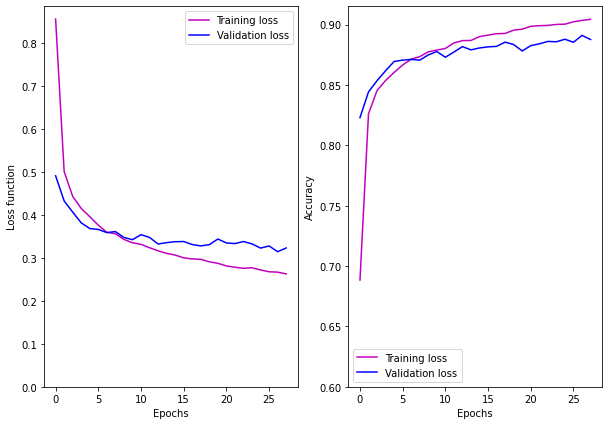

In [19]:
import matplotlib.pyplot as plt

# plot training results (loss and accuracy vs epoch)
plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.plot(train_loss_plot,color='m',label='Training loss')
plt.plot(test_loss_plot,color='b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.ylim(ymin = 0.0)
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_acc_plot,color='m',label='Training loss')
plt.plot(test_acc_plot,color='b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(ymin = 0.6)
plt.legend()

## Performances of the model on data

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 0.2459 - accuracy: 0.9050 - 192ms/epoch - 27ms/step

Test accuracy: 0.9049999713897705


In [21]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

The prediction of the model is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing:

In [22]:
predictions[0]

array([1.4802768e-11, 4.2859843e-20, 8.2669172e-17, 2.9902341e-16,
       3.1222464e-13, 8.9027969e-18, 3.0109679e-13, 2.9636804e-18,
       1.0000000e+00, 6.4403597e-20], dtype=float32)

 You can see which label has the highest confidence value:

In [23]:
np.argmax(predictions[0])

8

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

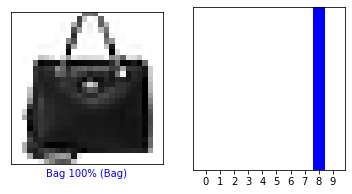

In [25]:
#for test_images, test_labels in test_ds:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

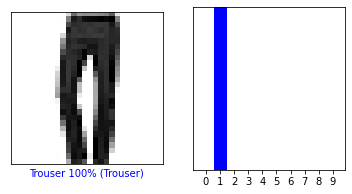

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

## Confusion matrix

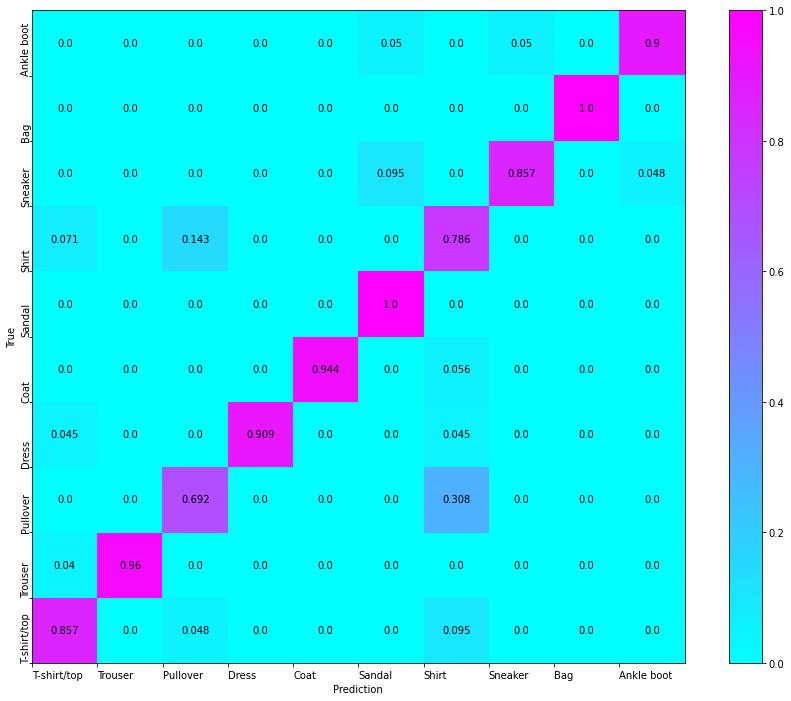

In [27]:
response, _, _ = np.histogram2d(np.argmax(predictions, axis=1), test_labels, bins=[np.linspace(0,10,11),np.linspace(0,10,11)])     

sum_of_rows = response.sum(axis=1)
norm_response = response / sum_of_rows[:, np.newaxis]

fig = plt.figure(figsize=(16, 12))
ax2 = fig.add_subplot(111)
size=10
x_start = 0.0
x_end = 10.0
y_start = 0.0
y_end = 10.0
extent = [x_start, x_end, y_start, y_end]
im=ax2.imshow(norm_response,extent=extent,origin="lower",interpolation='None',cmap="cool")
ax2.set_xlabel("Prediction")
ax2.set_ylabel("True")

ax2.set_xticks(range(10))
ax2.set_yticks(range(10))
ax2.set_xticklabels(class_names,rotation_mode="anchor", ha="left")
ax2.set_yticklabels(class_names,rotation_mode="anchor", ha="left", rotation=90)

# Add the text
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = round(norm_response[y_index, x_index],3)
        text_x = x + jump_x
        text_y = y + jump_y
        ax2.text(text_x, text_y, label, color='black', ha='center', va='center')
        
fig.colorbar(im)

## Same exercise with a CNN 

In [28]:
from tensorflow.keras import datasets, layers, models

tf.keras.utils.set_random_seed(42)

model_cnn = models.Sequential()
model_cnn.add(layers.Conv1D(64, 3, activation='relu', input_shape=(28, 28)))#64
model_cnn.add(layers.MaxPool1D(2))
model_cnn.add(layers.Conv1D(32, 3, activation='relu'))#32
model_cnn.add(layers.MaxPool1D(2))
model_cnn.add(layers.Conv1D(32, 3, activation='relu'))#32
model_cnn.add(layers.MaxPool1D(2))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(32, activation='relu'))
model_cnn.add(layers.Dense(10))

In [29]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 64)            5440      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 32)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 32)             3104      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 32)           

In [30]:
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

batch_size =  200
epochs = 50

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=10, verbose=1, mode='auto')

history_cnn = model_cnn.fit(train_images, 
                    train_labels,
                    batch_size = batch_size, 
                    callbacks = [earlystop],
                    validation_split = 0.1,
                    epochs=epochs)

Epoch 1/50
270/270 [==============================] - 3s 8ms/step - loss: 0.9020 - accuracy: 0.6691 - val_loss: 0.5931 - val_accuracy: 0.7773
Epoch 2/50
270/270 [==============================] - 2s 7ms/step - loss: 0.5588 - accuracy: 0.7953 - val_loss: 0.5259 - val_accuracy: 0.8072
Epoch 3/50
270/270 [==============================] - 2s 7ms/step - loss: 0.5059 - accuracy: 0.8172 - val_loss: 0.4963 - val_accuracy: 0.8207
Epoch 4/50
270/270 [==============================] - 2s 7ms/step - loss: 0.4701 - accuracy: 0.8317 - val_loss: 0.4590 - val_accuracy: 0.8272
Epoch 5/50
270/270 [==============================] - 2s 7ms/step - loss: 0.4422 - accuracy: 0.8409 - val_loss: 0.4388 - val_accuracy: 0.8377
Epoch 6/50
270/270 [==============================] - 2s 7ms/step - loss: 0.4231 - accuracy: 0.8465 - val_loss: 0.4232 - val_accuracy: 0.8422
Epoch 7/50
270/270 [==============================] - 2s 7ms/step - loss: 0.4095 - accuracy: 0.8503 - val_loss: 0.4262 - val_accuracy: 0.8410
Epoch 

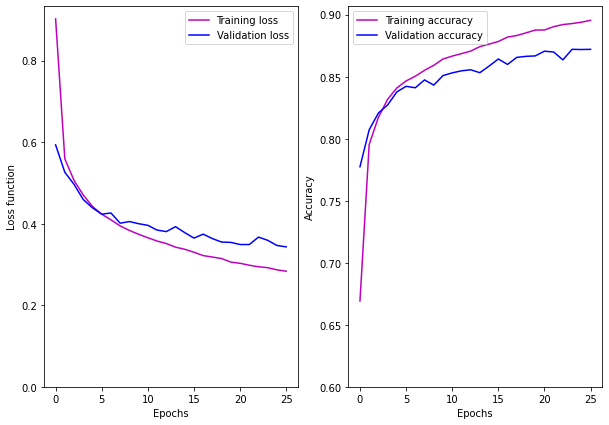

In [31]:
# plot training results (loss and accuracy vs epoch)
plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['loss'],color='m',label='Training loss')
plt.plot(history_cnn.history['val_loss'],color='b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.ylim(ymin = 0.0)
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'],color='m',label='Training accuracy')
plt.plot(history_cnn.history['val_accuracy'],color='b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(ymin = 0.6)
plt.legend()

In [32]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc_cnn)

7/7 - 0s - loss: 0.2998 - accuracy: 0.8950 - 133ms/epoch - 19ms/step

Test accuracy: 0.8949999809265137


In [33]:
probability_model_cnn = tf.keras.Sequential([model_cnn, tf.keras.layers.Softmax()])
predictions_cnn = probability_model_cnn.predict(test_images)

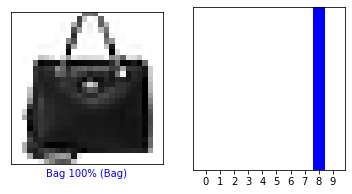

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_cnn[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_cnn[i],  test_labels)
plt.show()

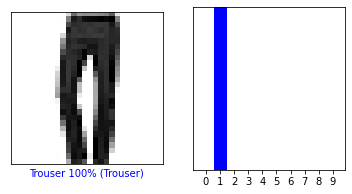

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_cnn[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_cnn[i],  test_labels)
plt.show()

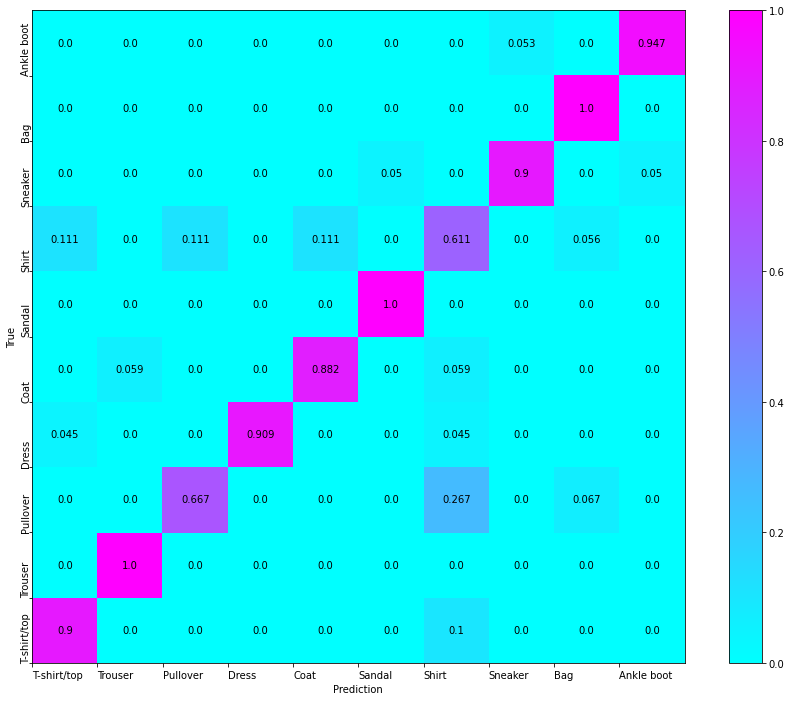

In [36]:
response_cnn, _, _ = np.histogram2d(np.argmax(predictions_cnn, axis=1), test_labels, bins=[np.linspace(0,10,11),np.linspace(0,10,11)])     

sum_of_rows = response_cnn.sum(axis=1)
norm_response = response_cnn / sum_of_rows[:, np.newaxis]

fig = plt.figure(figsize=(16, 12))
ax2 = fig.add_subplot(111)
size=10
x_start = 0.0
x_end = 10.0
y_start = 0.0
y_end = 10.0
extent = [x_start, x_end, y_start, y_end]
im=ax2.imshow(norm_response,extent=extent,origin="lower",interpolation='None',cmap="cool")
ax2.set_xlabel("Prediction")
ax2.set_ylabel("True")

ax2.set_xticks(range(10))
ax2.set_yticks(range(10))
ax2.set_xticklabels(class_names,rotation_mode="anchor", ha="left")
ax2.set_yticklabels(class_names,rotation_mode="anchor", ha="left", rotation=90)

# Add the text
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = round(norm_response[y_index, x_index],3)
        text_x = x + jump_x
        text_y = y + jump_y
        ax2.text(text_x, text_y, label, color='black', ha='center', va='center')
        
fig.colorbar(im)